In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('subsampling.tsv', sep='\t')

In [4]:
df.head()

,group,subset,valid,maxacc,diff,expid
0,tv,460,0.816105,0.867246,0.051141,463
1,tv,460,0.831579,0.846800,0.015221,188
2,tv,57,0.722105,0.711667,-0.010438,277
3,tv,921,0.828737,0.841379,0.012642,846
4,tv,1440,0.848000,0.865104,0.017104,612


In [5]:
df["proportion"] = round(df["subset"] / np.max(df["subset"]) * 100).astype(int)

In [6]:
df["proportion"].unique()

array([ 32,   4,  64, 100,   8,  16])

In [7]:
gb = df.groupby("subset")

In [8]:
max_acc = np.mean(df[df["proportion"] == 100]["valid"])
min_acc = np.mean(df[df["proportion"] == 4]["valid"])

In [9]:
min_acc

0.7371388181818183

In [41]:
def logistic(x, k, x0):
    return (max_acc / (1 + np.exp(-k * (x - x0))) )

def loglinear(x, a, b):
    return a * np.log2(x) + b 

[]

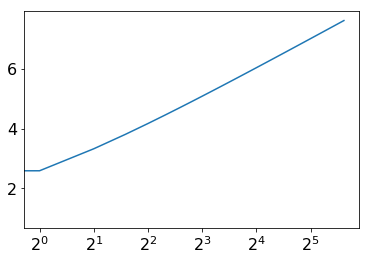

In [46]:
fig, ax = plt.subplots(1)
ax.plot(loglinear(np.linspace(1, 100), 1, 1))
ax.semilogx(basex=2)

In [11]:
import scipy.optimize as opt

In [54]:
params_logistic, cov_logistic = opt.curve_fit(logistic, df["proportion"], df["valid"], p0=[1, 1])
params_loglinear, cov_loglinear = opt.curve_fit(loglinear, df["proportion"], df["valid"], p0=[1, 1])


/Users/arokem/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [55]:
df["model"] = logistic(df["proportion"], *params_loglinear)

In [56]:
df_model = pd.DataFrame()

In [57]:
df_means = df.groupby(['proportion']).mean()
df_stds = df.groupby(['proportion']).std()

In [58]:
df_means

,subset,valid,maxacc,diff,expid,model
proportion,,,,,,
4,57.0,0.737139,0.739029,0.001890,505.363636,0.447526
8,115.0,0.769340,0.820079,0.050740,505.363636,0.469243
16,230.0,0.812287,0.821283,0.008996,505.363636,0.511962
32,460.0,0.828191,0.833273,0.005082,505.363636,0.591816
64,921.0,0.841053,0.849905,0.008852,505.363636,0.715681
100,1440.0,0.859014,0.849922,-0.009092,505.363636,0.795195


In [59]:
df_means = df.groupby(['proportion']).mean()

In [60]:
p_target =  max_acc * 0.95

In [61]:
max_acc

0.8590144545454546

In [62]:
p_target

0.8160637318181818

In [63]:
def target(x0):
    return np.abs(loglinear(x0, *params_loglinear) - p_target)

In [64]:
target(10)

0.036643838674820906

In [65]:
x_target = opt.fmin(target, 10)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44


In [66]:
x_target

array([27.18035889])

In [67]:
import palettable

In [68]:
palette = np.array(palettable.wesanderson.Zissou_5.colors)/255

In [69]:
rmse_loglinear = np.sqrt(np.mean(loglinear(df['proportion'], *params_loglinear) - df['valid'] ** 2))
rmse_logistic = np.sqrt(np.mean(logistic(df['proportion'], *params_logistic) - df['valid'] ** 2))

In [70]:
rmse_logistic, rmse_loglinear

(0.39480100621948877, 0.3913399465254929)

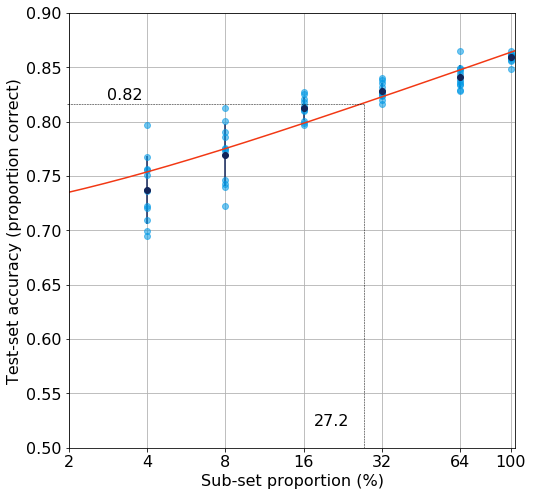

In [83]:
font = {'size': 16}
matplotlib.rc('font', **font)

fig, ax = plt.subplots()
ax.plot(df['proportion'], df['valid'], 'o', alpha=0.55, color=palette[0])
ax.plot(np.linspace(0, 110, 1000), loglinear(np.linspace(1, 110, 1000), *params_loglinear), color=palette[2])
#ax.plot(np.linspace(3.7, 100, 1000), logistic(np.linspace(3.7, 100, 1000), *params_logistic), color=palette[4])
ax.errorbar(df_means.index, df_means['valid'], yerr=df_stds['valid'], linestyle="None", marker="o", color=palette[1])
ax.semilogx(basex=2)
ax.set_xticks([2, 4, 8, 16, 32, 64, 100])
ax.set_xticklabels([2, 4, 8, 16, 32, 64, 100])
ax.minorticks_off()
ax.grid("on")
ax.set_ylim([0.5, 0.9])
ax.set_xlim([2, 104])
ax.plot([x_target, x_target], [0.5, p_target], 'k--', linewidth=0.5)
ax.plot([0, x_target], [p_target, p_target], 'k--', linewidth=0.5)
#ax.set_xticks([20.84], minor = True)
ax.set_yticks([p_target], minor=True)
ax.text(17.5, 0.52, "27.2")
ax.text(2.8, 0.82, "0.82")
#ax.set_xticklabels([20.84], minor=True)
#ax.set_yticklabels(["%2.2f"%p_target], minor=True)
ax.set_ylabel("Test-set accuracy (proportion correct)")
ax.set_xlabel("Sub-set proportion (%)")
fig.set_size_inches([8, 8])


In [30]:
cifar_subsample = np.array([[0.1004, 0.2204, 0.1344, 0.2954, 0.3978, 0.505, 0.6452, 0.7278],
                            [0.128, 0.1616, 0.1936, 0.2574, 0.3714, 0.3738, 0.5708, 0.7348],
                            [0.104, 0.2186, 0.2102, 0.3484, 0.3416, 0.3038, 0.527, 0.66],
                            [0.0974, 0.1874, 0.1646, 0.1866, 0.3068, 0.3154, 0.5074, 0.5946],
                            [0.1468, 0.099, 0.1316, 0.1934, 0.2356, 0.2762, 0.345, 0.4644],
                            [0.1112, 0.1246, 0.1046, 0.1302, 0.1092, 0.1478, 0.191, 0.188],
                            [0.0942, 0.0798, 0.0942, 0.101, 0.0948, 0.1046, 0.1084, 0.104]])

In [31]:
data_proportion = [1, 2, 4, 8, 16, 32, 64, 100]

In [32]:
from itertools import cycle
palette_cyc = cycle(palette)

In [33]:
palette_cyc

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 30
         Function evaluations: 60
[272.87139893]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 64
[512.72888184]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 70
[1306.18304443]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 72
[2113.13867188]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 90
[51296.83428955]
[1.53590778e+18]
[6.338253e+29]


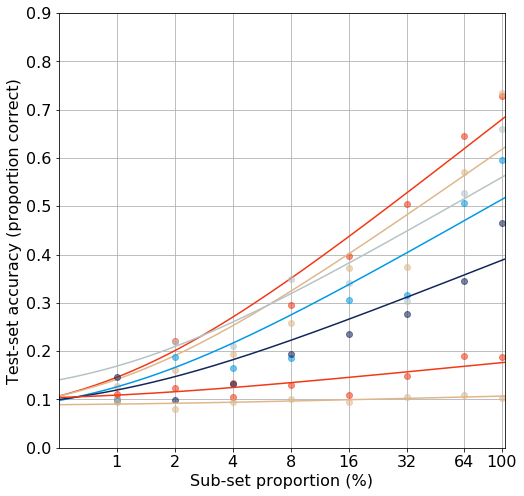

In [84]:
fig, ax = plt.subplots()
for ii, this in enumerate(cifar_subsample):
    color = next(palette_cyc)
    params_loglinear, cov_loglinear = opt.curve_fit(loglinear, data_proportion,  this, p0=[1, 1])
    def target(x0):
        return np.abs(loglinear(x0, *params_loglinear) - p_target)
    p_target =  max_acc * 0.95
    x_target = opt.fmin(target, 10)
    print(x_target)
    font = {'size': 16}
    matplotlib.rc('font', **font)

    ax.plot(data_proportion, this, 'o', alpha=0.55, color=color)
    ax.plot(np.linspace(0, 110, 1000), loglinear(np.linspace(1, 110, 1000), *params_loglinear), color=color)
    ax.semilogx(2)
    ax.set_xticks(data_proportion)
    ax.set_xticklabels(data_proportion)
    ax.minorticks_off()
    ax.grid("on")
    ax.set_ylim([0, 0.9])
    ax.set_xlim([0.5, 104])
    ax.set_ylabel("Test-set accuracy (proportion correct)")
    ax.set_xlabel("Sub-set proportion (%)")
    fig.set_size_inches([8, 8])


In [ ]:
learn1 = pd.read_csv('./learn.1.tsv', delimiter='\t')

In [ ]:
learn1["proportion"] = round(learn1["subset"] / np.max(learn1["subset"]) * 100).astype(int)

In [ ]:
learn1.head()

In [ ]:
gb_prop = learn1.groupby("proportion")

In [ ]:
learn1.proportion.unique()

In [ ]:
font = {'size': 14}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(6, 1)
ax = ax.ravel()

for ii, prop in enumerate([4, 8, 16, 32, 64, 100]):
    a = ax[ii]
    gb_id = learn1.iloc[gb_prop.groups[prop]].groupby("expid")
    for k, exp in gb_id:
        a.plot(exp['learningiter'], exp['acc'], color=palette[0], alpha=0.3)
        a.plot(exp['learningiter'][np.argmax(exp['acc'])], np.max(exp['acc']), 'o', color=palette[1], alpha=0.3)
    a.plot(exp['learningiter'], 
                 learn1.iloc[gb_prop.groups[prop]].groupby("learningiter").mean()['acc'],
                 color=palette[1])
    a.set_ylim([0.3, 1.0])
    a.set_xlim([-1000, 76000])
    a.text(62000, 0.35, prop)
    a.grid("on")
    a.set_yticklabels('')
    a.set_xticks([25000, 50000])
    a.set_xticklabels([])
    a.set_yticks([0.5, 1])
    a.set_yticklabels(a.get_yticks())

ax[3].text(-12000, 1.5, 'Validation accuracy', rotation=90)
#ax[3].text(set_ylabel()

ax[-1].set_xlabel("Iterations (k)")
ax[-1].set_xticklabels(["25", "50"])
fig.set_size_inches([5, 12])
plt.tight_layout()
fig.savefig('./learning.png')


In [ ]:
palette = np.concatenate([palette, [(np.array(palettable.wesanderson.Chevalier_4.colors)/255)[1]]])

In [ ]:
palette

In [ ]:
font = {'size': 14}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(1)
ax.plot(df['proportion'], df['valid'], 'o', alpha=0.55, color=palette[0])
ax.plot(np.linspace(0.1, 110, 1000), loglinear(np.linspace(0.1, 110, 1000), *params_loglinear), color=palette[2])
ax.errorbar(df_means.index, df_means['valid'], yerr=df_stds['valid'], linestyle="None", marker="o", color=palette[1])
ax.semilogx()
ax.set_xticks(df['proportion'].unique())
ax.set_xticklabels(df['proportion'].unique())
ax.minorticks_off()
ax.grid("on")
ax.set_ylim([0.5, 0.9])
ax.set_xlim([3, 120])
ax.plot([x_target, x_target], [0.5, p_target], 'k--')
ax.plot([3, x_target], [p_target, p_target], 'k--')
ax.set_xticks([27.2], minor = True)
ax.set_yticks([p_target], minor=True)
ax.text(17.5, 0.505, "27.2")
ax.text(3.2, 0.82, "0.82")
#ax.set_xticklabels([20.84], minor=True)
#ax.set_yticklabels(["%2.2f"%p_target], minor=True)
ax.set_ylabel("Test-set accuracy (proportion correct)")
ax.set_xlabel("Subset proportion (%)")
fig.set_size_inches([6, 6])
plt.tight_layout()
fig.savefig('./test.png')
fig, ax = plt.subplots(1)

i = 0
gb_prop = df.groupby(["proportion"])
for k, g in gb_prop:
    ax.scatter(g['maxacc'], g['valid'], color=palette[i], label=k, alpha=0.5)
    ax.legend(title="Subset")
    ax.errorbar(np.mean(g['maxacc']), np.mean(g['valid']), 
                yerr=np.std(g['valid']), xerr=np.std(g['maxacc']), color=palette[i], alpha=1, marker='o')
    i += 1
ax.grid("on")
ax.plot([0.5, 1.0], [0.5, 1.0], 'k--')
ax.set_ylim([0.5, 0.9])
ax.set_yticklabels([])
ax.set_xlim([0.5, 1])
ax.set_ylabel("Test-set accuracy (proportion correct)")
ax.set_xlabel("Validation accuracy (proportion correct)")
fig.set_size_inches([6, 6])
plt.tight_layout()
fig.savefig('./diff.png')

In [ ]:
learn2 = pd.read_csv('./learn.2.tsv', delimiter='\t')

In [ ]:
font = {'size': 14}
matplotlib.rc('font', **font)

gb_prop = learn1.groupby("proportion")
fig, ax = plt.subplots(1, 3)
ax = ax.ravel()

kkk = [learn1.iloc[gb_prop.groups[4]], learn2]
for ii, gb_id in enumerate([learn1.iloc[gb_prop.groups[4]].groupby("expid"), 
                            learn2.groupby("expid")]):
    a = ax[ii]
    for k, exp in gb_id:
        a.plot(exp['learningiter'], exp['acc'], color=palette[0], alpha=0.3)
        a.plot(exp['learningiter'][np.argmax(exp['acc'])], np.max(exp['acc']), 'o', color=palette[1], alpha=0.3)
    a.plot(exp['learningiter'], 
           kkk[ii].groupby("learningiter").mean()['acc'],
           color=palette[1])
    a.set_ylim([0.3, 1.0])
    a.set_xlim([-1000, 76000])
    a.grid("on")
    a.set_yticklabels('')
    a.set_xlabel("Iterations (k)")
    a.set_xticks([25000, 50000])
    a.set_xticklabels(["25", "50"])

    
ax[0].set_title("Random subsets")
ax[1].set_title("Fixed subsets")

ax[0].set_ylabel('Validation\naccuracy')
ax[0].set_yticklabels(ax[0].get_yticks())
fig.set_size_inches([10, 4])
ax[2].errorbar(1, np.mean(learn1.iloc[gb_prop.groups[4]].groupby("expid").max()['acc']), 
               yerr=np.std(learn1.iloc[gb_prop.groups[4]].groupby("expid").max()['acc']),
               marker='o', color=palette[1])

ax[2].errorbar(2, np.mean(learn2.groupby("expid").max()['acc']), 
               yerr=np.std(learn2.groupby("expid").max()['acc']),
               marker='o', color=palette[1])
ax[2].set_ylim([0.3, 1.0])
ax[2].set_xlim([0, 3.0])

ax[2].set_yticklabels([])
ax[2].set_xticks([1, 2])
ax[2].set_xticklabels(['Random', 'Fixed'])
ax[2].set_xlabel("Subsets")
for ii, letter in enumerate(["A", "B", "C"]):
    ax[ii].text(0.93, 0.93, letter, 
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax[ii].transAxes,
            fontdict={'size': 16})

plt.tight_layout()

fig.set_size_inches([8, 6])
fig.savefig('./fourpercent.png')